### Import libraries

In [1]:
import pretty_midi
from midi_preprocessing import *

/usr/lib/python3.13/site-packages/pretty_midi/instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


### Open midi file

In [2]:
filename = 'raw/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.midi'
midi = pretty_midi.PrettyMIDI(filename)

### Compute sampling frequency

In [3]:
# Define the nuber of columns per bar.
COLS_PER_BAR = 16 # Found in the paper.

bar_duration = get_bar_duration(midi)
print("Bar duration =", bar_duration)

fs = COLS_PER_BAR / bar_duration
print("Sampling frequency =", fs)

Bar duration = 2.0
Sampling frequency = 8.0


### Create piano rolls

In [4]:
# Input file piano roll.
original_roll = midi.get_piano_roll(fs=fs)

# Create meoldy piano roll.
melody_roll = extract_melody(midi, fs=fs)

# Melody filled roll.
filled_roll = fill_melody_pauses(melody_roll)

# Normalize melody roll (notes in range C4-B5) (i.e. 60-83)
melody_roll_norm = normalize_melody_roll(melody_roll, lb=60, ub=83)

# Chords roll.
chords_roll = original_roll - melody_roll

### Create midi file starting from piano roll

In [5]:
melody_pm = piano_roll_to_pretty_midi(melody_roll, fs=fs)
melody_pm_norm = piano_roll_to_pretty_midi(melody_roll_norm, fs=fs)
filled_pm = piano_roll_to_pretty_midi(filled_roll, fs=fs)
chords_pm = piano_roll_to_pretty_midi(chords_roll, fs=fs)

Original roll


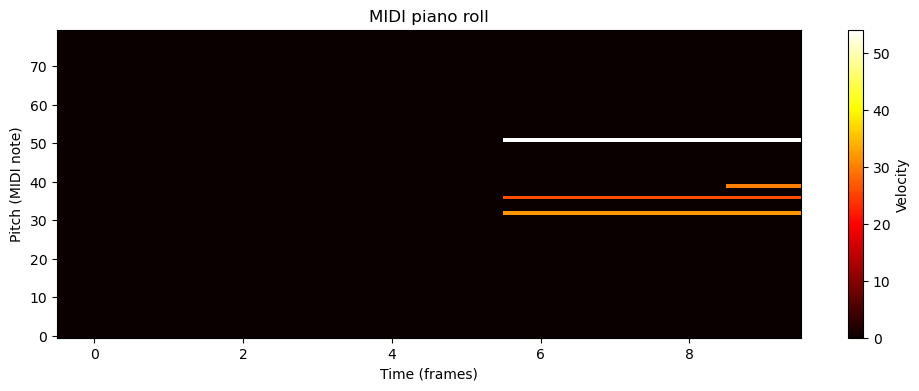

Melody roll


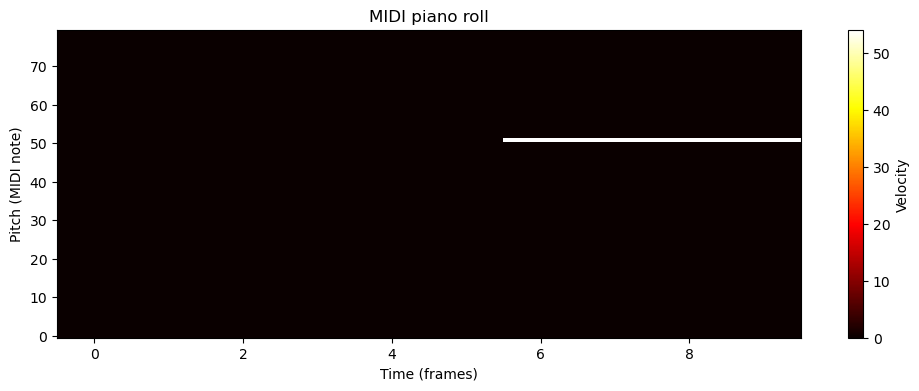

Filled_roll


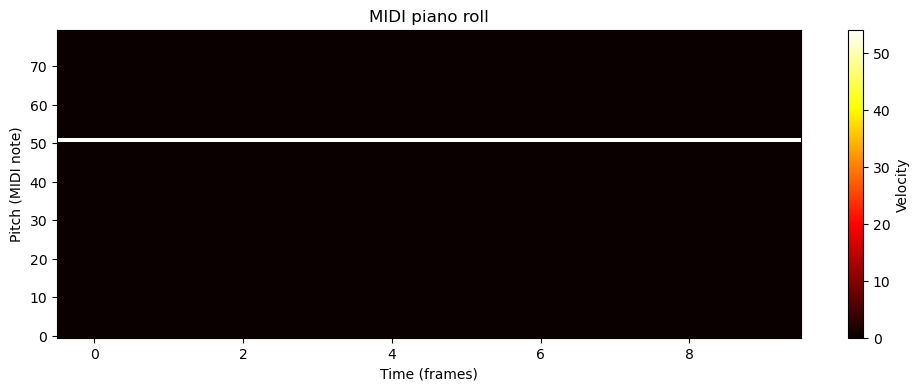

Normalized melody roll


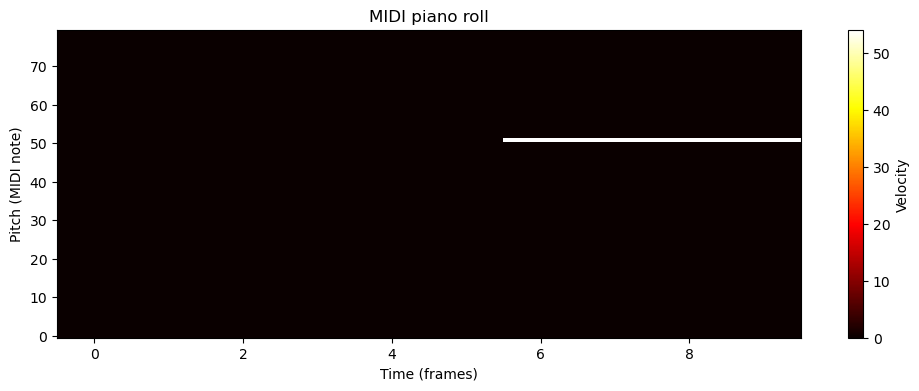

Chords roll


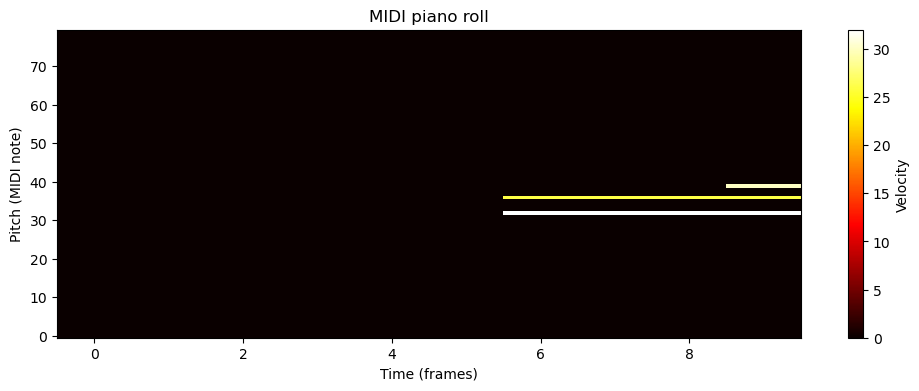

In [11]:
# Binarize melody piano roll.
#melody_roll[melody_roll > 0] = 1
#melody_roll_norm[melody_roll_norm > 0] = 1

slices = (slice(30, 110), slice(0, 20))

print("Original roll")
show_piano_roll(original_roll, slicing=slices)

print("Melody roll")
show_piano_roll(melody_roll, slicing=slices)

print("Filled_roll")
show_piano_roll(filled_roll, slicing=slices)

print("Normalized melody roll")
show_piano_roll(melody_roll_norm, slicing=slices)

print("Chords roll")
show_piano_roll(chords_roll, slicing=slices)

### Create midi files

In [7]:
melody_pm.write("melody.midi")
melody_pm_norm.write("melody_norm.midi")
filled_pm.write("filled.midi")
chords_pm.write("chords.midi")